Written by Devanshu Thakar

This notebook can be used to plot varoius quantities for the simulation data analyzed using analysis.ipynb. Change the variable dirI, dirII etc. to the path to your analyzed simulation directory. 

Currently this notebook produces plots for DP_w, PDI, Rg, shape anisotrpy (k^2). For generating polts of other quantities edit the notebook accordingly. 

In [1]:
!pwd
!ls

/home/nileshthakar
apps			DPw_R_2.png  dpw-with-bead-no.png  Figure4.png
average_analysis.ipynb	DPw_R_3.png  dpw-with-Nx.png	   nanogels
compare_shape.ipynb	DPw_R_4.png  Figure1.png	   pdi-all.png
dpw-all.png		DPw_R_5.png  Figure2.png	   pdi-with-bead-no.png
DPw_R_1.png		DPw_R.ipynb  Figure3.png	   pdi-with-Nx.png


In [2]:
import numpy as np
import time as clock
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import math
import subprocess
import sys

In [3]:
# Please note that directory path as string should end with '/'
nanogels = "/home/nileshthakar/nanogels/"

dirI=nanogels+"NX10/reps5/r_97/degrade/result/"
dirII=nanogels+"NX10/reps6/r_85/degrade/result/"
dirIII=nanogels+"NX10/reps6/r_97/degrade/result/"
dirIV=nanogels+"NX6/reps6/r_96/degrade/result/"
dirV=nanogels + "NX20/reps6/r_64/degrade/result/"

tstart = 1200000
tstep = 5000        # Numerical time step in calculation
tend = 7200000
timestep = 0.02
step = 100


In [ ]:
I ={"shape_avg":np.loadtxt(dirI + "shape_avg.txt"), "shape_std":np.loadtxt(dirI + "shape_std.txt"), "rg":np.loadtxt(dirI + "rg_average.txt"), "dpw":np.loadtxt(dirI + "dpw_average.txt"), "pdi":np.loadtxt(dirI + "pdi_average.txt")}
II ={"shape_avg":np.loadtxt(dirII + "shape_avg.txt"), "shape_std":np.loadtxt(dirII + "shape_std.txt"), "rg":np.loadtxt(dirII + "rg_average.txt"), "dpw":np.loadtxt(dirII + "dpw_average.txt"), "pdi":np.loadtxt(dirII + "pdi_average.txt")}
III ={"shape_avg":np.loadtxt(dirIII + "shape_avg.txt"), "shape_std":np.loadtxt(dirIII + "shape_std.txt"), "rg":np.loadtxt(dirIII + "rg_average.txt"), "dpw":np.loadtxt(dirIII + "dpw_average.txt"), "pdi":np.loadtxt(dirIII + "pdi_average.txt")}
IV ={"shape_avg":np.loadtxt(dirIV + "shape_avg.txt"), "shape_std":np.loadtxt(dirIV + "shape_std.txt"), "rg":np.loadtxt(dirIV + "rg_average.txt"),  "dpw":np.loadtxt(dirIV + "dpw_average.txt"), "pdi":np.loadtxt(dirIV + "pdi_average.txt")}
V ={"shape_avg":np.loadtxt(dirV + "shape_avg.txt"), "shape_std":np.loadtxt(dirV + "shape_std.txt"), "rg":np.loadtxt(dirV + "rg_average.txt"),  "dpw":np.loadtxt(dirV + "dpw_average.txt"), "pdi":np.loadtxt(dirV + "pdi_average.txt")}

In [ ]:
# columns in dictionary["rg"]:  time, rg
# columns in dictionary["shape_avg/std"]: - timestep, l1, l2, l3, I1, I2, I3, k^2 
no_rows = np.shape(I["shape_avg"])[0]
time = (I["shape_avg"][:,0] - tstart)*timestep

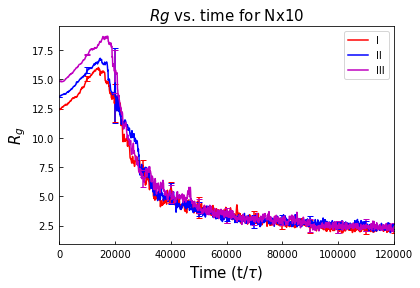

In [4]:
# Plotting Rg
fig, ax = plt.subplots()
plt.xlim([0, time[-1]])
ax.plot(time, I["rg"][:,1], label = "I",color='r')
plt.errorbar(time[0:no_rows:step], I["rg"][:,1][0:no_rows:step], yerr=I["rg"][:,2][0:no_rows:step],color='r', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, II["rg"][:,1], label = "II", color='b')
plt.errorbar(time[0:no_rows:step], II["rg"][:,1][0:no_rows:step], yerr=II["rg"][:,2][0:no_rows:step], color='b', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, III["rg"][:,1], label = "III",color='m')
plt.errorbar(time[0:no_rows:step], III["rg"][:,1][0:no_rows:step], yerr=III["rg"][:,2][0:no_rows:step], color='m', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.set_xlabel("Time "+'(t/'+r'$\tau$)',fontsize=15)
ax.set_ylabel(r'$R_g$',fontsize=15)
ax.tick_params(axis="y",direction="in", pad=5)
ax.tick_params(axis="x",direction="in", pad=5)
ax.set_title(r'$Rg$' + ' vs. time for Nx10', fontsize=15)
plt.legend(['I', 'II', 'III'])

plt.savefig("Figure1.png", dpi=300, bbox_inches='tight')


# Plotting dpw
fig, ax = plt.subplots()
plt.xlim([0, time[-1]])
ax.plot(time, I["dpw"][:,1], label = "I",color='r')
plt.errorbar(time[0:no_rows:step], I["dpw"][:,1][0:no_rows:step], yerr=I["dpw"][:,2][0:no_rows:step],color='r', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, II["dpw"][:,1], label = "II", color='b')
plt.errorbar(time[0:no_rows:step], II["dpw"][:,1][0:no_rows:step], yerr=II["dpw"][:,2][0:no_rows:step], color='b', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, III["dpw"][:,1], label = "III",color='m')
plt.errorbar(time[0:no_rows:step], III["dpw"][:,1][0:no_rows:step], yerr=III["dpw"][:,2][0:no_rows:step], color='m', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.set_xlabel("Time "+'(t/'+r'$\tau$)',fontsize=15)
ax.set_ylabel(r'$DP_w$',fontsize=15)
ax.tick_params(axis="y",direction="in", pad=5)
ax.tick_params(axis="x",direction="in", pad=5)
plt.legend(['I', 'II', 'III'])
ax.set_title(r'$DP_w$' + ' vs. time for Nx10', fontsize=15)

plt.savefig("dpw-with-bead-num.png", dpi=300, bbox_inches='tight')

# Plotting PDI
fig, ax = plt.subplots()
plt.xlim([0, time[-1]])
ax.plot(time, I["pdi"][:,1], label = "I",color='r')
plt.errorbar(time[0:no_rows:step], I["pdi"][:,1][0:no_rows:step], yerr=I["pdi"][:,2][0:no_rows:step],color='r', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, II["pdi"][:,1], label = "II", color='b')
plt.errorbar(time[0:no_rows:step], II["pdi"][:,1][0:no_rows:step], yerr=II["pdi"][:,2][0:no_rows:step], color='b', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, III["pdi"][:,1], label = "III",color='m')
plt.errorbar(time[0:no_rows:step], III["pdi"][:,1][0:no_rows:step], yerr=III["pdi"][:,2][0:no_rows:step], color='m', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.set_xlabel("Time "+'(t/'+r'$\tau$)',fontsize=15)
ax.set_ylabel(r'$PDI(t)$',fontsize=15)
ax.tick_params(axis="y",direction="in", pad=5)
ax.tick_params(axis="x",direction="in", pad=5)
plt.legend(['I', 'II', 'III'])
ax.set_title(r'$PDI$' + ' vs. time for Nx10', fontsize=15)

plt.savefig("pdi-with-bead-num.png", dpi=300, bbox_inches='tight')


# Plotting k^2
fig, ax = plt.subplots()
plt.xlim([0, time[-1]])
plt.ylim([0, 1])
ax.plot(time, I["shape_avg"][:,7], label = "I",color='r')
plt.errorbar(time[0:no_rows:step], I["shape_avg"][:,7][0:no_rows:step], yerr=I["shape_std"][:,7][0:no_rows:step], color='r', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, II["shape_avg"][:,7], label = "II", color='b')
plt.errorbar(time[0:no_rows:step], II["shape_avg"][:,7][0:no_rows:step], yerr=II["shape_std"][:,7][0:no_rows:step],color='b', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, III["shape_avg"][:,7], label = "III",color='m')
plt.errorbar(time[0:no_rows:step], III["shape_avg"][:,7][0:no_rows:step], yerr=III["shape_std"][:,7][0:no_rows:step], color='m', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.set_xlabel('Time (t/'+r'$\tau$)',fontsize=15)
ax.set_ylabel(r'$\kappa^2$', fontsize=15)
ax.set_title(r'$\kappa^2$' + ' vs. time for Nx10', fontsize=15)
ax.tick_params(axis="y",direction="in", pad=5)
ax.tick_params(axis="x",direction="in", pad=5)
plt.legend( ['I', 'II', 'III'])
plt.savefig("Figure3.png", dpi=300, bbox_inches='tight')

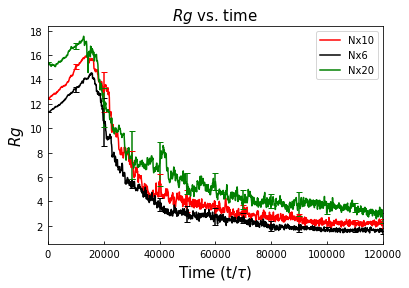

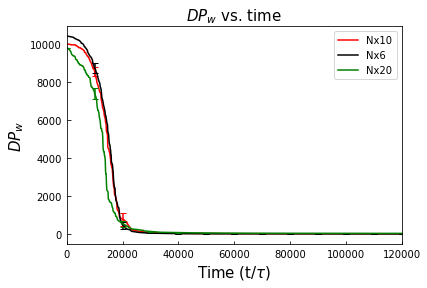

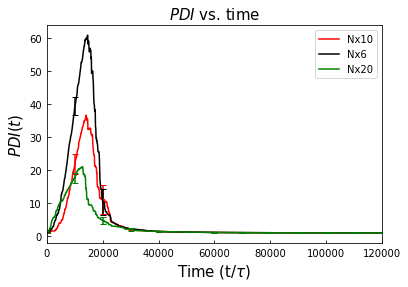

In [10]:
# columns in dictionary["rg"]:  time, rg
# columns in dictionary["shape_avg/std"]: - timestep, l1, l2, l3, I1, I2, I3, k^2 
no_rows = np.shape(IV["shape_avg"])[0]
time = (IV["shape_avg"][:,0] - tstart)*timestep
step = 100

# Plotting Rg
fig, ax = plt.subplots()
plt.xlim([0, time[-1]])
ax.plot(time, I["rg"][:,1], label = "I",color='r')
plt.errorbar(time[0:no_rows:step], I["rg"][:,1][0:no_rows:step], yerr=I["rg"][:,2][0:no_rows:step],color='r', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, IV["rg"][:,1], label = "IV", color='k')
plt.errorbar(time[0:no_rows:step], IV["rg"][:,1][0:no_rows:step], yerr=IV["rg"][:,2][0:no_rows:step], color='k', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, V["rg"][:,1], label = "V",color='g')
plt.errorbar(time[0:no_rows:step], V["rg"][:,1][0:no_rows:step], yerr=V["rg"][:,2][0:no_rows:step], color='g', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.set_xlabel('Time (t/'+r'$\tau$)',fontsize=15)
ax.set_ylabel(r'$Rg$', fontsize=15)
ax.tick_params(axis="y",direction="in", pad=5)
ax.tick_params(axis="x",direction="in", pad=5)
ax.set_title(r'$Rg$' + ' vs. time', fontsize=15)
plt.legend(['Nx10', 'Nx6', 'Nx20'])
plt.savefig("Figure2.png", dpi=300, bbox_inches='tight')


# Plotting DPw
fig, ax = plt.subplots()
plt.xlim([0, time[-1]])
ax.plot(time, I["dpw"][:,1], label = "I",color='r')
plt.errorbar(time[0:no_rows:step], I["dpw"][:,1][0:no_rows:step], yerr=I["dpw"][:,2][0:no_rows:step],color='r', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, IV["dpw"][:,1], label = "IV", color='k')
plt.errorbar(time[0:no_rows:step], IV["dpw"][:,1][0:no_rows:step], yerr=IV["dpw"][:,2][0:no_rows:step], color='k', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, V["dpw"][:,1], label = "V",color='g')
plt.errorbar(time[0:no_rows:step], V["dpw"][:,1][0:no_rows:step], yerr=V["dpw"][:,2][0:no_rows:step], color='g', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.set_xlabel('Time (t/'+r'$\tau$)',fontsize=15)
ax.set_ylabel(r'$DP_w$', fontsize=15)
ax.tick_params(axis="y",direction="in", pad=5)
ax.tick_params(axis="x",direction="in", pad=5)
ax.set_title(r'$DP_w$' + ' vs. time', fontsize=15)
plt.legend(['Nx10', 'Nx6', 'Nx20'])
plt.savefig("dpw-with-Nx.png", dpi=300, bbox_inches='tight')

# Plotting PDI
fig, ax = plt.subplots()
plt.xlim([0, time[-1]])
ax.plot(time, I["pdi"][:,1], label = "I",color='r')
plt.errorbar(time[0:no_rows:step], I["pdi"][:,1][0:no_rows:step], yerr=I["pdi"][:,2][0:no_rows:step],color='r', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, IV["pdi"][:,1], label = "IV", color='k')
plt.errorbar(time[0:no_rows:step], IV["pdi"][:,1][0:no_rows:step], yerr=IV["pdi"][:,2][0:no_rows:step], color='k', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, V["pdi"][:,1], label = "V",color='g')
plt.errorbar(time[0:no_rows:step], V["pdi"][:,1][0:no_rows:step], yerr=V["pdi"][:,2][0:no_rows:step], color='g', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.set_xlabel('Time (t/'+r'$\tau$)',fontsize=15)
ax.set_ylabel(r'$PDI(t)$', fontsize=15)
ax.tick_params(axis="y",direction="in", pad=5)
ax.tick_params(axis="x",direction="in", pad=5)
ax.set_title(r'$PDI$' + ' vs. time', fontsize=15)
plt.legend(['Nx10', 'Nx6', 'Nx20'])
plt.savefig("pdi-with-Nx.png", dpi=300, bbox_inches='tight')

# Plotting k^2
fig, ax = plt.subplots()
plt.xlim([0, time[-1]])
plt.ylim([0, 1])
ax.plot(time, I["shape_avg"][:,7], label = "I",color='r')
plt.errorbar(time[0:no_rows:step], I["shape_avg"][:,7][0:no_rows:step], yerr=I["shape_std"][:,7][0:no_rows:step], color='r', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, IV["shape_avg"][:,7], label = "IV", color='k')
plt.errorbar(time[50:no_rows:step], IV["shape_avg"][:,7][50:no_rows:step], yerr=IV["shape_std"][:,7][50:no_rows:step],color='k', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, V["shape_avg"][:,7], label = "V",color='g')
plt.errorbar(time[125:no_rows:step], V["shape_avg"][:,7][125:no_rows:step], yerr=V["shape_std"][:,7][125:no_rows:step], color='g', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.set_xlabel('Time (t/'+r'$\tau$)',fontsize=15)
ax.set_ylabel(r'$\kappa^2$', fontsize=15)
ax.tick_params(axis="y",direction="in", pad=5)
ax.tick_params(axis="x",direction="in", pad=5)
ax.set_title(r'$\kappa^2$' + ' vs. time', fontsize=15)
plt.legend(['Nx10', 'Nx6', 'Nx20'])
plt.savefig("Figure4.png", dpi=300, bbox_inches='tight')

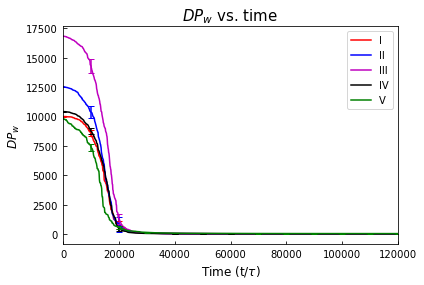

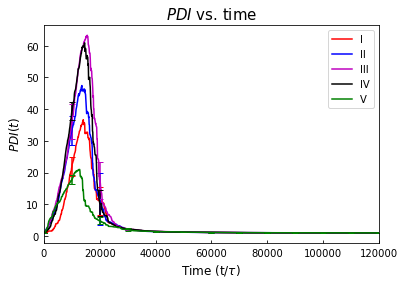

In [13]:
# Plotting dpw
fig, ax = plt.subplots()
plt.xlim([0, time[-1]])
ax.plot(time, I["dpw"][:,1], label = "I",color='r')
plt.errorbar(time[0:no_rows:step], I["dpw"][:,1][0:no_rows:step], yerr=I["dpw"][:,2][0:no_rows:step],color='r', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, II["dpw"][:,1], label = "II", color='b')
plt.errorbar(time[0:no_rows:step], II["dpw"][:,1][0:no_rows:step], yerr=II["dpw"][:,2][0:no_rows:step], color='b', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, III["dpw"][:,1], label = "III",color='m')
plt.errorbar(time[0:no_rows:step], III["dpw"][:,1][0:no_rows:step], yerr=III["dpw"][:,2][0:no_rows:step], color='m', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, IV["dpw"][:,1], label = "IV", color='k')
plt.errorbar(time[0:no_rows:step], IV["dpw"][:,1][0:no_rows:step], yerr=IV["dpw"][:,2][0:no_rows:step], color='k', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, V["dpw"][:,1], label = "V",color='g')
plt.errorbar(time[0:no_rows:step], V["dpw"][:,1][0:no_rows:step], yerr=V["dpw"][:,2][0:no_rows:step], color='g', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.set_xlabel("Time "+'(t/'+r'$\tau$)',fontsize=12)
ax.set_ylabel(r'$DP_w$',fontsize=12)
ax.tick_params(axis="y",direction="in", pad=5)
ax.tick_params(axis="x",direction="in", pad=5)
plt.legend(['I', 'II', 'III', 'IV', 'V'])
ax.set_title(r'$DP_w$' + ' vs. time ', fontsize=15)

plt.savefig("dpw-all.png", dpi=300, bbox_inches='tight')

# Plotting PDI
fig, ax = plt.subplots()
plt.xlim([0, time[-1]])
ax.plot(time, I["pdi"][:,1], label = "I",color='r')
plt.errorbar(time[0:no_rows:step], I["pdi"][:,1][0:no_rows:step], yerr=I["pdi"][:,2][0:no_rows:step],color='r', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, II["pdi"][:,1], label = "II", color='b')
plt.errorbar(time[0:no_rows:step], II["pdi"][:,1][0:no_rows:step], yerr=II["pdi"][:,2][0:no_rows:step], color='b', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, III["pdi"][:,1], label = "III",color='m')
plt.errorbar(time[0:no_rows:step], III["pdi"][:,1][0:no_rows:step], yerr=III["pdi"][:,2][0:no_rows:step], color='m', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, IV["pdi"][:,1], label = "IV", color='k')
plt.errorbar(time[0:no_rows:step], IV["pdi"][:,1][0:no_rows:step], yerr=IV["pdi"][:,2][0:no_rows:step], color='k', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.plot(time, V["pdi"][:,1], label = "V",color='g')
plt.errorbar(time[0:no_rows:step], V["pdi"][:,1][0:no_rows:step], yerr=V["pdi"][:,2][0:no_rows:step], color='g', fmt=' ', solid_capstyle='projecting', capsize=3)

ax.set_xlabel("Time "+'(t/'+r'$\tau$)',fontsize=12)
ax.set_ylabel(r'$PDI(t)$',fontsize=12)
ax.tick_params(axis="y",direction="in", pad=5)
ax.tick_params(axis="x",direction="in", pad=5)
plt.legend(['I', 'II', 'III', 'IV', 'V'])
ax.set_title(r'$PDI$' + ' vs. time', fontsize=15)

plt.savefig("pdi-all.png", dpi=300, bbox_inches='tight')

In [ ]:
# Plotting ratio of largest and smalles eigen value of diagonalized gyration tensor
# Columns in shape_avg.txt - time step, l1, l2, l3, I1, I2, I3, k^2
# Eigen values are l1 >= l2 >= l3
fig, ax = plt.subplots()
# plt.xlim([0, time[-1]])
# plt.ylim([0, 1])
l1 = I["shape_avg"][:,1]
l3 = I["shape_avg"][:,3]

ratio = l1/l3
print(ratio)

# ax.plot(time, IV["shape_avg"][:,7], label = "IV",color='k')

# ax.set_xlabel('Time (t/'+r'$\tau$)',fontsize=15)
# ax.set_ylabel(r'$\kappa^2$', fontsize=15)
# ax.set_title(r'$\kappa^2$' + ' vs. time for Nx10', fontsize=15)
# ax.tick_params(axis="y",direction="in", pad=5)
# ax.tick_params(axis="x",direction="in", pad=5)
# plt.legend( ['I', 'II', 'III'])
# plt.savefig("Figure3.png", dpi=300, bbox_inches='tight')